In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Домашняя работа: деревья решений

В этой домашней работе вам предстоит научиться предсказывать цены товаров из маркетплейса Azamon.

Требования к домашней работе:
- Во всех графиках должны быть подписи через title, legend, etc.
- Во время обучения моделей проверяйте, что у вас не текут данные. Обычно это позитивно влияет на качество модели на тесте, но негативно влияет на оценку 🌚
- Если вы сдаете работу в Google Colaboratory, убедитесь, что ваша тетрадка доступна по ссылке. Если в итоге по каким-то причинам тетрадка не будет открываться у преподавателя, задание не будет засчитано
- Использование мемов допускается, но необходимо соблюдать меру. Несодержательная работа, состоящая только из мемов, получает 0 баллов.

# Загрузка и подготовка данных

In [ ]:
!gdown 18PVwZWFbpRbEHW-Hc8R0DUTl9CF1aQa0 -O data.csv

In [4]:
df = pd.read_csv('data.csv').drop(columns=[
    'product_name',
    'index',
    'uniq_id',
    'customers_who_bought_this_item_also_bought',
    'items_customers_buy_after_viewing_this_item',
    'sellers',
    'description', # text
    'product_information', # text
    'product_description', # text
    'customer_questions_and_answers', # text
    'customer_reviews', # text
])

In [5]:
df.columns

Index(['manufacturer', 'price', 'number_available_in_stock',
       'number_of_reviews', 'number_of_answered_questions',
       'average_review_rating', 'amazon_category_and_sub_category'],
      dtype='object')

In [ ]:
X, y = df.drop(columns=['price']), df.price

## Очистка данных (1 балл)

Посмотрите на признаки. Есть ли в них пропуски? Какое соотношение между NaN'ами и общим количеством данных? Есть ли смысл выкидывать какие-либо данные из этого датасета?

In [82]:
df_clean = df.dropna(subset=['manufacturer', 'amazon_category_and_sub_category'])
# df_clean

In [83]:
# Ваш код
df_clean.loc[df_clean['number_available_in_stock'].isna(), 'number_available_in_stock'] = 0
df_clean

,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category
0,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
1,FunkyBuys,£16.99,0,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
2,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
3,Hornby,£39.99,0,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
4,Hornby,£32.19,0,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
...,...,...,...,...,...,...,...
8542,Mattel,£22.95,5 new,3,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...
8543,Star Wars,£39.99,0,1,3.0,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys
8544,Olde Scotland Yard Ltd.,£43.99,3 new,1,3.0,5.0 out of 5 stars,Novelty & Special Use > Novelty > Accessories ...
8545,DC Comics,£49.81,3 new,1,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...


In [85]:
X, y = df_clean.drop(columns=['price']), df_clean.price

## Подготовка данных (3 балла)

Обработайте признаки. Выполните кодирование категориальных признаков, заполните пропуски в числовых признаках. Обратите внимание, что в датасете есть признак, который разбивается на несколько подпризнаков. Что это за признак? Закодируйте и его.

Дополнительные вопросы (+ 1 балл):
- Какие из признаков в этом датасете лучше кодировать через ordinal encoding?
- Какие из признаков допустимо кодировать через one-hot?

Прим.: суммарно за эту секцию можно получить до 4 баллов.

На мой взгляд, больше всего для ordinal encoding подходит "average_review_rating".
А для one-hot подходит "number_available_in_stock", а именно вторая часть этого признака.

In [88]:
X['number_of_reviews'].loc[X['number_of_answered_questions']=='1,040']

Series([], Name: number_of_reviews, dtype: object)

In [89]:
# numeric_columns = ['number_of_reviews', 'number_of_answered_questions']
# for column in numeric_columns:
#     X[column].fillna(X[column].median(), inplace=True)
X['average_review_rating'].fillna(X['average_review_rating'].mode(), inplace=True)

In [90]:
X['number_of_reviews'] = X['number_of_reviews'].str.replace(',', '').astype(float)

# X['number_of_reviews'] = X['number_of_reviews'].astype(float)
X['number_of_reviews'].fillna(X['number_of_reviews'].mean(), inplace=True)

In [91]:
X['number_of_answered_questions'] = X['number_of_answered_questions'].astype(float)

# X['number_of_reviews'] = X['number_of_reviews'].astype(float)
X['number_of_answered_questions'].fillna(X['number_of_answered_questions'].mean(), inplace=True)

In [94]:
categorical_columns = ['manufacturer', 'average_review_rating', 'amazon_category_and_sub_category', 'unit']
X = pd.get_dummies(X, columns=categorical_columns)

In [93]:
# Ваш код

X[['number', 'unit']] = X['number_available_in_stock'].str.split('\xa0', expand=True)
X.drop('number_available_in_stock', axis=1, inplace=True)

In [96]:
X['number'].fillna(0, inplace=True)
X

,number_of_reviews,number_of_answered_questions,number,manufacturer_101,manufacturer_16th Birthday 16th Foil Banner - 9ft,manufacturer_1st birthday,manufacturer_2-in-1 Chess & Draughts,manufacturer_24 Game,manufacturer_4 Pocket Pro Binder Black,"manufacturer_45"" Sunset Glow Pool",...,"amazon_category_and_sub_category_Storage, Cleaning & Ring Sizers > Boxes & Organisers",amazon_category_and_sub_category_Supporters' Gear > Football > Memorabilia & Collectibles,"amazon_category_and_sub_category_Sweets, Chocolate & Gum > Chocolate > Bars > Multipack Bars",amazon_category_and_sub_category_Women > Accessories,amazon_category_and_sub_category_Women > Accessories > Eyewear & Accessories > Sunglasses,amazon_category_and_sub_category_Worlds Apart > Kid Venture > Kites,unit_collectible,unit_new,unit_refurbished,unit_used
0,15.0,1.0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,17.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8542,3.0,3.0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8543,1.0,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8544,1.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8545,1.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Обучение модели (3 балла)

## Бейзлайн

Обучите базовую модель. Для этого используйте `sklearn.dummy.DummyRegressor`. Какое качество она показывает на тесте? Посчитайте MSE, RMSE.

In [97]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65, random_state=42)


In [98]:
y_train = y_train.str.replace('£', '').str.replace(',', '').astype(float)
y_test = y_test.str.replace('£', '').str.replace(',', '').astype(float)

In [99]:
from sklearn.dummy import DummyRegressor


dummy = DummyRegressor()
dummy.fit(X_train, y_train)


DummyRegressor()

In [103]:
# Проверьте качество бейзлайна
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Предсказываем значения для тестовой выборки
y_pred = dummy.predict(X_test)

# Оцениваем качество модели с помощью MSE и RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)

MSE:  1604.1019066646816
RMSE:  40.051241012791124
MAE:  17.866323487413478


## Дерево решений

Обучите регрессионное дерево решений, проверьте качество этой модели на тестовой выборке. Улучшилось ли качество по сравнению с базовой моделью? Оцените r2_score обученной модели.

In [ ]:
X_train

In [104]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error as mse

# создание объекта модели
model = DecisionTreeRegressor()

# обучение модели на тренировочных данных
model.fit(X_train, y_train)

# оценка качества модели на тестовых данных
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)

# вывод результата
print("R2 score:", score)

R2 score: -0.2933915849836295


## Линейная регрессия

Попробуйте обучить линейную регрессию с параметрами по умолчанию. Оцените r2_score на тестовой выборке. Сравните качество с деревом решений. 

In [51]:
from sklearn.linear_model import LinearRegression

In [105]:
# Ваш код

# Обучение линейной регрессии
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Предсказание на тестовой выборке с помощью линейной регрессии
linear_regression_predictions = linear_regression.predict(X_test)

# оценка качества модели
linear_regression_r2 = r2_score(y_test, linear_regression_predictions)

print("R2 score:", linear_regression_r2)

R2 score: -1.5884631278500717e+17


R2_score в линейной регрессии получился уже слишком огромным, возможно где-то ошибка, которую я не смог найти.

Если сравнивать согласно полученным значениям, то дерево решений в разы работают лучше на этих данных.

# Гиперпараметры (2 балла)

Переберите несколько гиперпараметров (не более двух-трёх). Обратите внимание, как эти параметры влияют на ошибку модели на тестовой выборке. Постройте для глубины дерева график переобучения (fitting curve) аналогичный тому, что мы строили на занятии. Найдите глубину дерева, начиная с которой модель начинает переобучаться.

In [111]:
import seaborn as sns


def plot_fitting_curve(parameter: str, values: list, X_train, X_test, y_train, y_test):
    train_curve = []
    test_curve = []
    for value in values:
        model = DecisionTreeRegressor(**{parameter: value})
        model.fit(X_train, y_train)
        y_pred_train, y_pred_test = model.predict(X_train), model.predict(X_test)
        train_curve.append(mse(y_train, y_pred_train))
        test_curve.append(mse(y_test, y_pred_test))
    sns.lineplot(x=values, y=train_curve)
    sns.lineplot(x=values, y=test_curve)

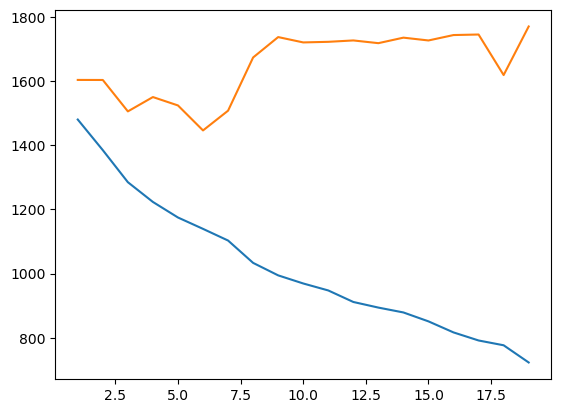

In [110]:
# Ваш код

plot_fitting_curve('max_depth', np.arange(1, 20), X_train, X_test, y_train, y_test)

Начиная с глубины 3 дерево начинает переобучаться.

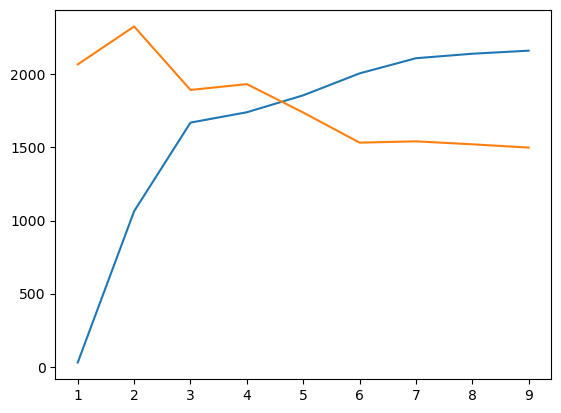

In [117]:
plot_fitting_curve('min_samples_leaf', np.arange(1, 10), X_train, X_test, y_train, y_test)

# Простое ансамблирование (1 балл)

В этой секции мы реализуем простой ансамбль деревьев.

In [118]:
class EnsembleTreeRegressor:
    def __init__(self, num_trees=5, samples_frac=0.8, **model_kwargs):
        self._samples_frac = 0.8
        self._trees = [DecisionTreeRegressor(**model_kwargs) for _ in range(num_trees)]

    def fit(self, x: pd.DataFrame, y: pd.Series):
        for tree in self._trees:
            tree_x = x.sample(frac=self._samples_frac, random_state=42)
            tree_y = y[tree_x.index]
            tree.fit(tree_x, tree_y)

    def predict(self, x: pd.DataFrame):
        # В качестве предсказания ансамбля будем выдавать усреднение предсказаний деревьев
        predictions = []
        for tree in self._trees:
            predictions.append(tree.predict(x))
        return np.mean(predictions, axis=0)

In [121]:
ensembleTreeRegressor = EnsembleTreeRegressor()

ensembleTreeRegressor.fit(X_train, y_train)

predictions_ensemble = ensembleTreeRegressor.predict(X_test)

r2_ensemble = r2_score(y_test, predictions_ensemble)

-0.17127917182903096

In [122]:
print(r2_ensemble)

-0.17127917182903096


В какой-то степени ансамбль в данном случае сработал лучше.

Проверьте, работает ли этот ансамбль лучше обычного дерева с параметрами по умолчанию?

Дополнительно переберите максимальную глубину дерева. Проверьте, насколько отличается момент начала переобучения у одиночного дерева и у ансамбля. Зависит ли этот момент от числа деревьев (`num_trees`)? От числа примеров для каждого дерева (`samples_frac`)? Постройте график fitting curve.

In [123]:
def plot_fitting_ensemble_curve(parameter: str, values: list, X_train, X_test, y_train, y_test):
    train_curve = []
    test_curve = []
    for value in values:
        model = EnsembleTreeRegressor(**{parameter: value})
        model.fit(X_train, y_train)
        y_pred_train, y_pred_test = model.predict(X_train), model.predict(X_test)
        train_curve.append(mse(y_train, y_pred_train))
        test_curve.append(mse(y_test, y_pred_test))
    sns.lineplot(x=values, y=train_curve)
    sns.lineplot(x=values, y=test_curve)

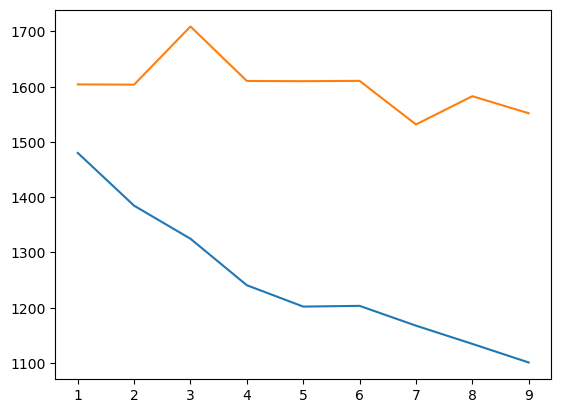

In [126]:
plot_fitting_ensemble_curve('max_depth', np.arange(1, 10), X_train, X_test, y_train, y_test)

Судя по этому графику, переобучение у одиночного дерева и ансамбля не сильно отличается.

In [129]:
ensembleTreeRegressor_3 = EnsembleTreeRegressor(num_trees=3)

ensembleTreeRegressor_3.fit(X_train, y_train)

predictions_ensemble_3 = ensembleTreeRegressor_3.predict(X_test)

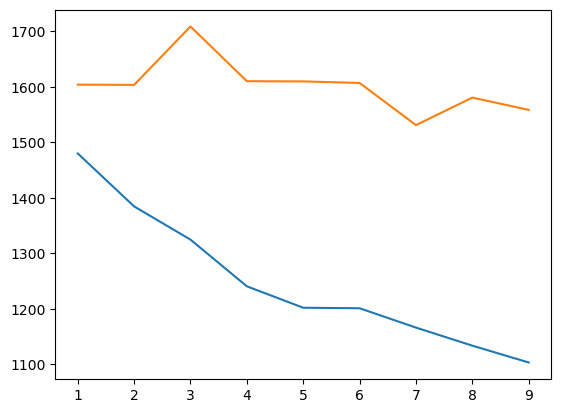

In [130]:
plot_fitting_ensemble_curve('max_depth', np.arange(1, 10), X_train, X_test, y_train, y_test)

Судя по графикам в зависимости от количества деревьев, число деревьев не влияет на переобучени, однако возможен такой момент, что я рассмотрел всего один случай. 

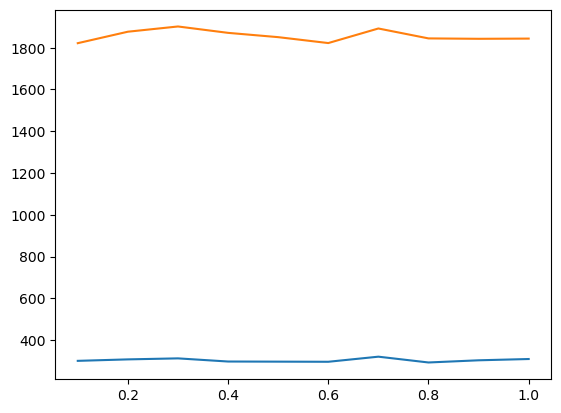

In [139]:
plot_fitting_ensemble_curve('samples_frac', np.arange(0.1, 1.1, 0.1), X_train, X_test, y_train, y_test)

In [ ]:
От числа примеров не зависит.